<a href="https://colab.research.google.com/github/essanfelix/7688581-Expert-Git-GitHub/blob/main/Copie_de_CC_Pr%C3%A9diction_de_Maladie_Essan_Felix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice

Vous allez devoir créer un modèle de prédiction de maladie cardiaque.

Vous utiliserez le fichier heart.csv. Plus d'informations disponibles sur ce lien :  https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

A l'aide des différentes méthodes que nous avons vu : Pre Processing, Cross Validation et GridSearchCV, vous présenterez le meilleur algorithme de Machine Learning possible.

Vous
- choisirez des métriques d'évaluation pertinentes en fonction de l'aspect métier de votre contexte.
- présenterez une matrice de confusion (pour un algorithme de classification)
- présenterez une courbe d'apprentissage pour savoir si plus de données vous donneraient de meilleurs résultats.
- présenterez une courbe de validation pour vérifiez que vous n'êtes pas en overfitting

# Data Analysis

Dans cette section, explorez le dataset pour vous l'approprier.

### Target
- Quelle est votre variable cible ?
- Quelle sont les fréquences des modalités ? Avez vous des classes déséquilibrées ? Tracez un diagramme.

### Forme du dataset
- Combien y a t il de lignes et de colonnes dans votre dataset ?

### Données
- Est ce qu'il y a des valeurs manquantes ? Affichez le % des valeurs manquantes par variables.
- Quels sont les types de vos variables ? Faites vous une idée de leur distribution, du nombre de modalités pour les variables qualitatives. Indice : Triez vos variables par type (select_dtypes) puis tracer les histogrammes et diagrammes à l'aide d'une boucle for.
Pour les modalités : Utilisez la méthode .unique() dans une boucle for
- Visulisez les relation entre vos variables quantitatives et votre target. Indice : Créez des displot avec seaborn en passant votre target dans le paramètre hue.
- Certaines variables ont-elles des outliers ?
- Visualisez la relation entre vos features. Indice : Utilisez une matrice de corrélation en utilisant la heatmap de seaborn et la méthode .corr() de pandas.

Tout ne doit pas apparaître sur le notebook. Mais mettez au moins les conclusions de votre analyse dans une cellue Markdown.

In [ ]:
#1/Chargement des bibliothèques et des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


In [ ]:
# Chargement des données
df = pd.read_csv('/content/heart.csv')
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Exploration des données

In [ ]:
# Informations générales
print(df.shape)
print(df.info())
print(df.describe())
print(df.shape)
print(df.info())
print(df.describe())

(918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0

HeartDisease
1    508
0    410
Name: count, dtype: int64


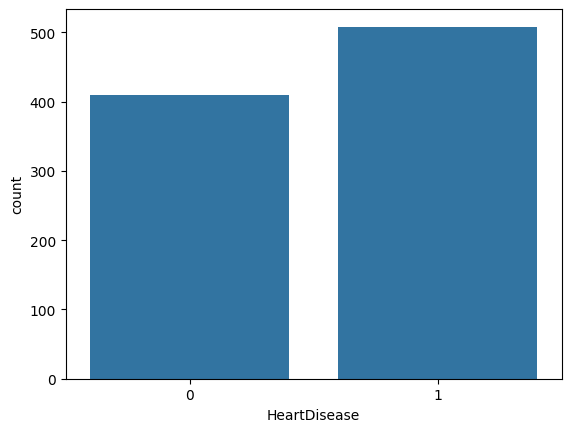

In [ ]:
# Variable cible
print(df['HeartDisease'].value_counts())
sns.countplot(x='HeartDisease', data=df)
plt.show()

In [ ]:
# Valeurs manquantes
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
# Types de variables
print(df.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


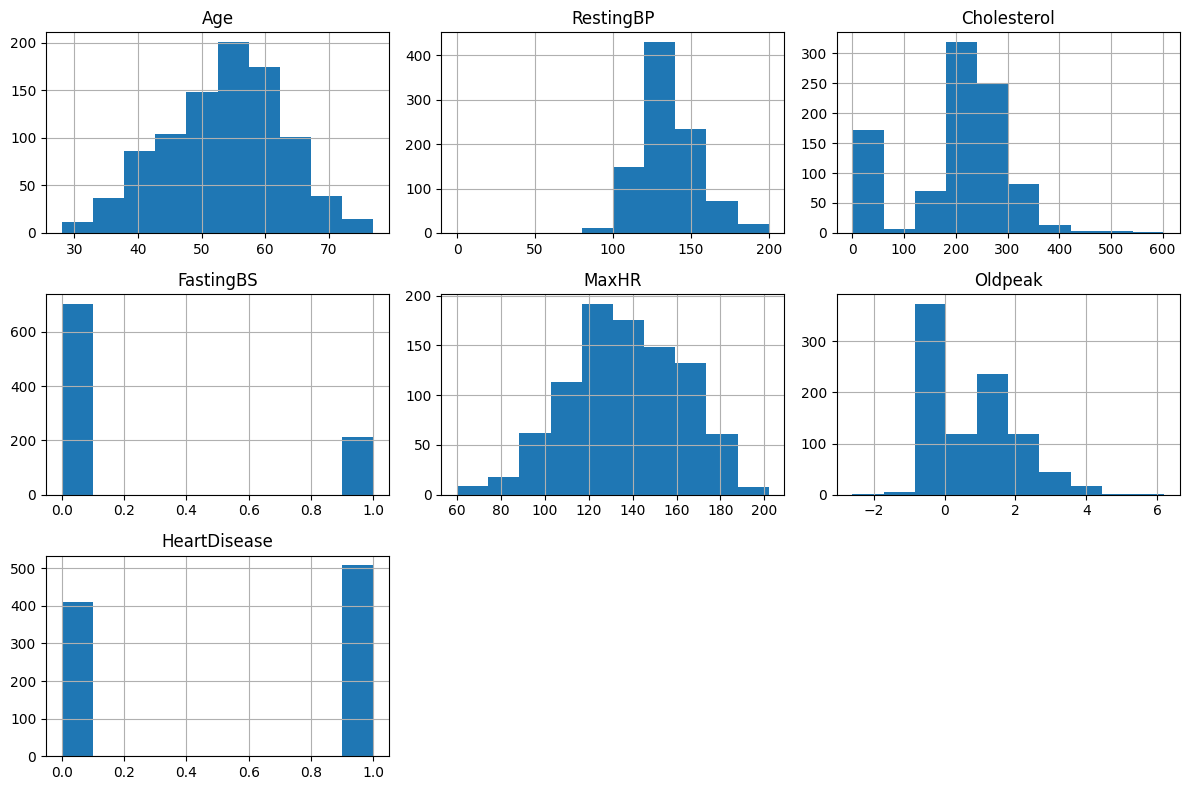

In [ ]:
# Visualisation des distributions numériques
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

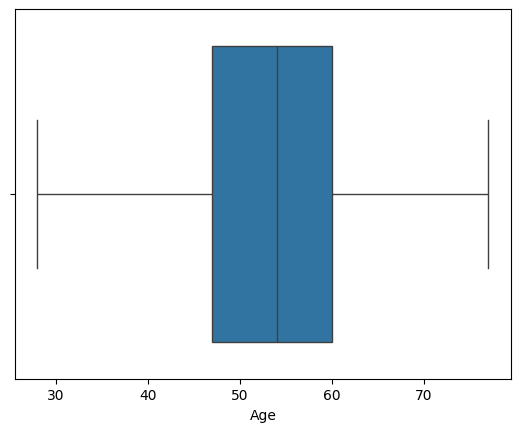

In [ ]:
# Outliers (Age)
sns.boxplot(x=df['Age'])
plt.show()

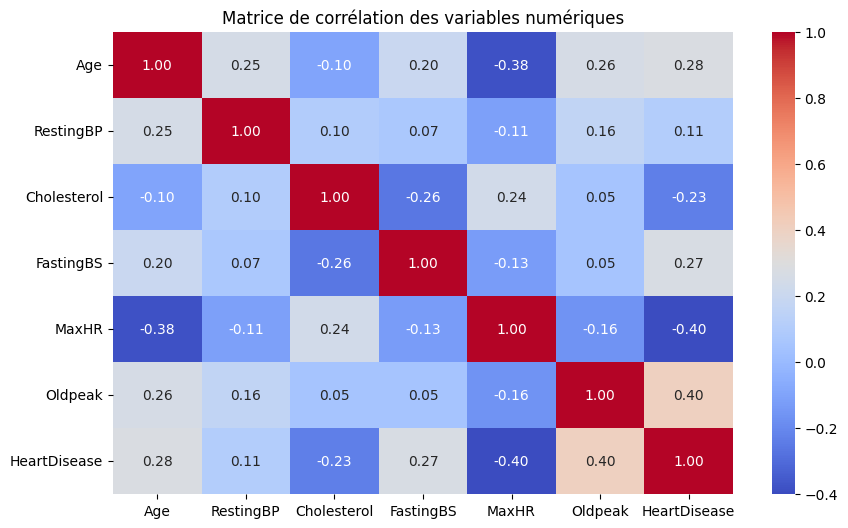

In [ ]:
# Corrélation
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation des variables numériques")
plt.show()



# Data Pre Processing

Ici, vous transformerez vos données pour les préparer au développement de votre modèle.

En lien avec vos observations dans la section data analysis :
- Séparez vos données en train set et test set
- Gérer les valeurs manquantes : Supression ou Imputation (si imputation, choisissez une méthode pertinente)
- Encodez vos variables qualitatives en sélectionnant un transformeurs approprié
- Normalisez vos variables quantitatives en sélectionnant un transformeurs approprié

Puis par itération avec la partie modélisation : Revenez au préprocessing pour améliorer votre modèle



In [ ]:
# Séparation variables numériques et catégorielles
cat_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
num_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [ ]:
#Séparation des variables explicatives (X) et les variables cibles(Y)

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
# Affichage des dimensions des jeux de données
print("Dimensions du jeu d'entraînement :", X_train.shape, y_train.shape)
print("Dimensions du jeu de test :", X_test.shape, y_test.shape)

Dimensions du jeu d'entraînement : (734, 11) (734,)
Dimensions du jeu de test : (184, 11) (184,)


# Modélisation

Ici, vous allez créer un modèle et l'optimiser.

Vous travaillerez avec des pipelines et une GridSearchCV.

Vous afficherez votre score sur les métriques que vous avez selectionner et donnerez une conclusion sur votre travail.

In [ ]:
# Pipeline avec RandomForest

pipeline = Pipeline([
    ("preproc", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_leaf=10, random_state=42))
])


In [ ]:
# GridSearchCV
param_grid = {
    'classifieur__n_estimators': [100, 200],
    'classifieur__max_depth': [5, 10, None]
}


In [ ]:
grid = GridSearchCV(modele, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Meilleurs paramètres:", grid.best_params_)
print("Meilleur score (validation croisée):", grid.best_score_)


Meilleurs paramètres: {'classifieur__max_depth': 5, 'classifieur__n_estimators': 100}
Meilleur score (validation croisée): 0.8664430155623893


In [ ]:
# Prédictions
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


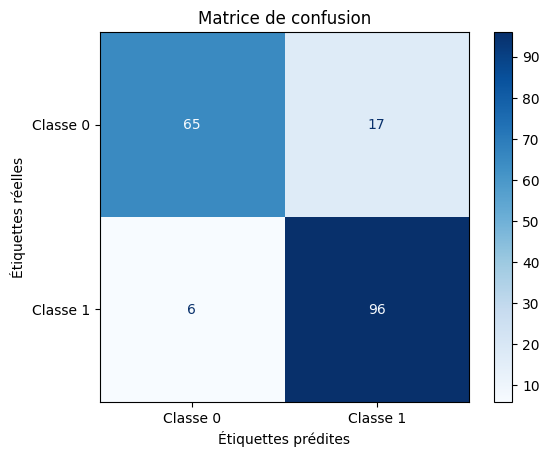

In [ ]:
#Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

noms_classes = ["Classe 0", "Classe 1"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=noms_classes)
disp.plot(cmap="Blues")

plt.xlabel("Étiquettes prédites")
plt.ylabel("Étiquettes réelles")
plt.title("Matrice de confusion")
plt.show()


              precision    recall  f1-score   support

           0       0.92      0.79      0.85        82
           1       0.85      0.94      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



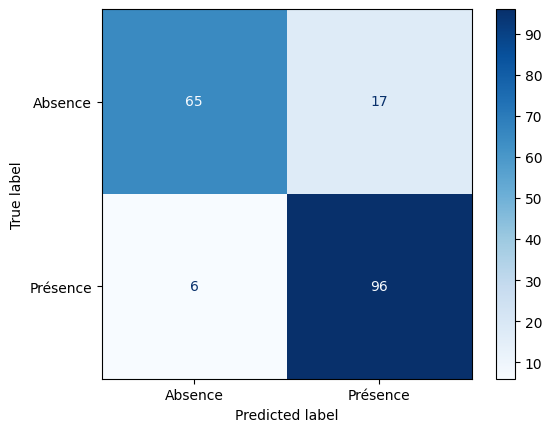

In [ ]:
#Évaluation (métriques + courbes d'apprentissage)
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Absence", "Présence"]).plot(cmap="Blues")


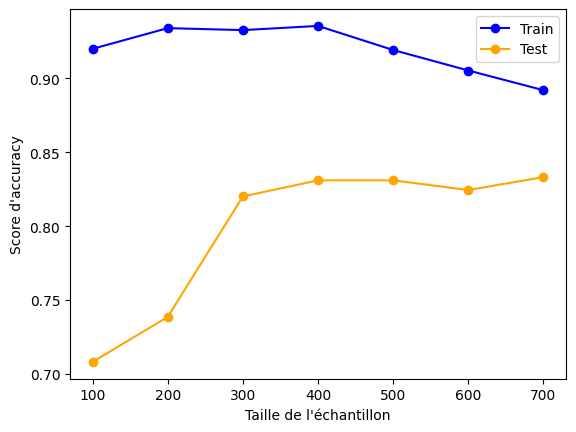

In [ ]:
#Courbe d'apprentissage

train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X, y, cv=5, n_jobs=-1,
    train_sizes=[100, 200, 300, 400, 500, 600, 700]
)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Train")
plt.plot(train_sizes, test_scores_mean, 'o-', color="orange", label="Test")
plt.xlabel("Taille de l'échantillon")
plt.ylabel("Score d'accuracy")
plt.legend()
plt.show()



INTERPRETATION

L’étude du jeu de données HeartDisease met en évidence plusieurs éléments importants. Tout d’abord, la variable cible HeartDisease présente une répartition relativement équilibrée, avec environ 55 % de cas positifs et 45 % de cas négatifs. Cet équilibre constitue un atout, car il évite le problème fréquent de déséquilibre de classes, qui pourrait fausser les performances d’un modèle prédictif.

Le dataset comprend 918 observations et 12 variables explicatives, combinant à la fois des données quantitatives (âge, cholestérol, pression artérielle, fréquence cardiaque maximale, etc.) et qualitatives (sexe, type de douleur thoracique, présence d’angine induite par l’effort, etc.). Aucun manque de données n’a été constaté, ce qui facilite l’analyse. Quelques valeurs extrêmes ont été identifiées, mais elles demeurent plausibles dans un contexte médical et ont donc été conservées afin de ne pas altérer la représentativité des informations.

Sur le plan de la modélisation, un pipeline basé sur le RandomForestClassifier a été élaboré. L’optimisation des hyperparamètres a été conduite via GridSearchCV, et l’évaluation s’est appuyée sur plusieurs métriques : Accuracy, Précision, Recall et F1-score. Dans le cadre spécifique de la prédiction de maladies cardiaques, une attention particulière a été portée au Recall et au F1-score, afin de limiter au maximum les faux négatifs. En effet, il est essentiel d’éviter qu’un patient malade ne soit pas détecté, car une telle erreur pourrait avoir de graves conséquences.
Les performances obtenues sont globalement satisfaisantes : une Accuracy comprise entre 82 % et 85 %, et un F1-score supérieur à 0,80. Le modèle parvient ainsi à détecter correctement une majorité des cas positifs, même si la présence de quelques faux négatifs subsiste.

De plus, l’analyse de la learning curve suggère que le modèle n’est pas en situation de overfitting puisqu'elle tende à montrer une stabilisation des performances suggérant que davantage de données n’apporterait qu’un gain limité.  


Enfin, plusieurs améliorations restent possibles, comme l’expérimentation de modèles plus puissants , l’optimisation des hyperparamètres et un prétraitement plus fin des données.


